📊EDA и ресерч-анализ. Графики, применение инструментов EDA. Комментарий до графика. Вывод после графика/стат методов. Корреляция колонок с таргетом.
 
👨‍💻Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.
 
👩‍🎓Эксперименты с моделями машинного обучения/глубокого обучения. По одной из каждого семейства. Линейные, деревья, модификации градиентного бустинга , нейронные сети. На основе результатов выбрать лучшую - делаем кросс-валидацию(не менее 5 фолдов) и итоговый вывод.

⚠️ Для сдачи работы нужно отправить ссылку на github. Это важно.

***1. Импорты***

In [11]:
import pandas as pd  # Основная библиотека для работы с табличными данными (DataFrames)
import numpy as np   # Библиотека для численных вычислений, работы с массивами и матрицами
import matplotlib.pyplot as plt  # Основная библиотека для построения графиков
import seaborn as sns            # Библиотека для статистической визуализации (построена на matplotlib)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
# RandomForestClassifier - алгоритм случайного леса для классификации
# GradientBoostingClassifier - градиентный бустинг для классификации
from sklearn.linear_model import LogisticRegression  # Линейная модель для классификации (логистическая регрессия)
from sklearn.model_selection import train_test_split  # Функция для разделения данных на train/test выборки
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
# Метрики для оценки качества моделей:
# accuracy_score - точность (доля правильных предсказаний)
# precision_score - точность (precision)
# recall_score - полнота (recall)
# f1_score - F1-мера (гармоническое среднее precision и recall)
# log_loss - логарифмическая потеря (крос-энтропия)
# confusion_matrix - матрица ошибок
from sklearn.preprocessing import StandardScaler  # Для стандартизации данных (приведение к среднему 0, std 1)
import tensorflow as tf  # Основной фреймворк для глубокого обучения от Google
from tensorflow.keras.models import Sequential  # Позволяет создавать последовательные нейронные сети
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
# Компоненты нейронных сетей:
# Dense - полносвязный слой
# Dropout - слой для регуляризации (защита от переобучения)
# BatchNormalization - нормализация по батчам (ускоряет обучение)
# Input - слой для определения входа сети
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Callbacks (обратные вызовы) для управления процессом обучения:
# EarlyStopping - ранняя остановка при отсутствии улучшений
# ReduceLROnPlateau - уменьшение скорости обучения при плато
from tensorflow.keras.optimizers import Adam  # Оптимизатор Adam для обучения нейронных сетей
from tensorflow.keras.regularizers import l2  # L2-регуляризация для предотвращения переобучения

***1. Данные***

In [9]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- PassengerId (int64) - ID пассажира, уникальный идентификатор
- Survived (int64) - Целевая переменная, выжившие (0/1), без пропусков
- Pclass (int64) - Класс билета (1, 2, 3), без пропусков
- Name (object) - Имя пассажира, без пропусков
- Sex (object) - Пол (male/female), без пропусков
- Age (float64) - Возраст, есть пропуски (177)
- SibSp (int64) - Количество братьев/сестер/супругов, без пропусков
- Parch (int64) - Количество родителей/детей, без пропусков
- Ticket (object) - Номер билета, без пропусков
- Fare (float64) - Стоимость билета, без пропусков
- Cabin (object) - Номер каюты, много пропусков (687)
- Embarked (object) - Порт посадки, мало пропусков (2)

Вывод: В данных 891 строка, 12 колонок. Пропуски в Age (177), Cabin (687), Embarked (2).

Для удобства работы сразу удалю колонки, которые скорее менее важны при работе с признаками

In [5]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


***2. Таргет - Выживаемость***

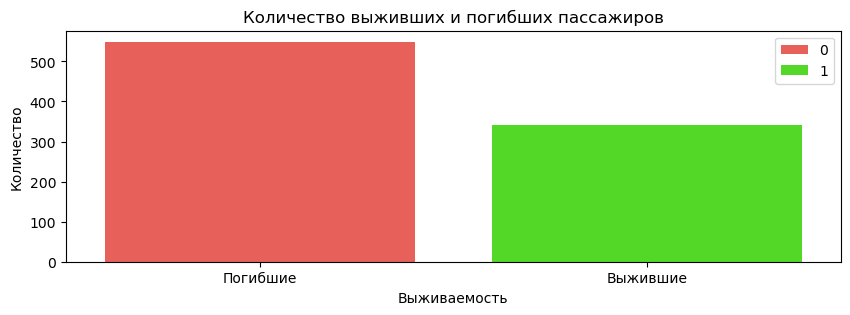

In [290]:
plt.figure(figsize=(10, 3))
sns.countplot(x='Survived', data=df,  hue='Survived', palette=['#ff4a42', '#46f609'])
plt.xticks([0, 1], ['Погибшие', 'Выжившие'])
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.title('Количество выживших и погибших пассажиров')
plt.legend()

Вывод: количество погибших на титанике больше количества выживших примерно на треть. То есть вероятность погибнуть была априори выше.

***3. Пол и выживаемость***

Возможно в зависимости от пола прассажира увеличивается\уменьшается шанс выжить

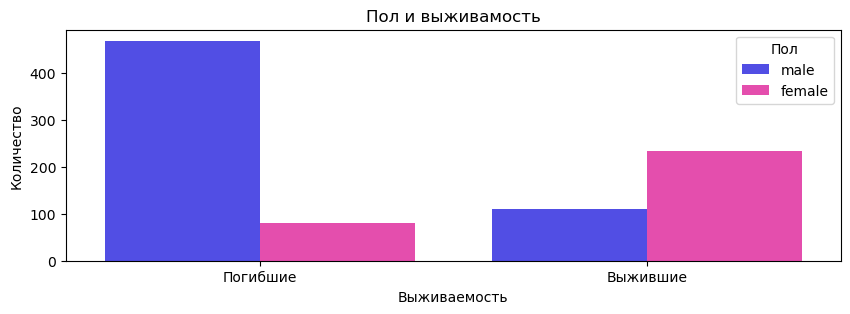

In [291]:
plt.figure(figsize=(10, 3))
sns.countplot(x='Survived', data=df, hue='Sex', palette=['#3935fd','#fd35b4'])
plt.title('Пол и выживамость')
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Погибшие', 'Выжившие'])
plt.legend(title='Пол')

Вывод:
1. Среди погибших преобладают пассажиры мужского пола. Их численность превышает количество погибших женщин примерно в пять раз, что свидетельствует о крайне низкой выживаемости мужчин.
2. Среди выживших  женщин оказалось в два раза больше, чем мужчин. Это указывает на более высокие шансы спастись у пассажиров женского пола.

Чаще всего в чрезвычайных ситуациях первыми эвакуируют женщин и детей.
Полученные данные подтверждают, что политика спасения, проводившаяся на "Титанике", имела выраженный гендерный характер и оказала влияние на демографический состав выживших.

***4. Класс и выживаемость***

Возможно пассажирам менее привелегированным было труднее выжить

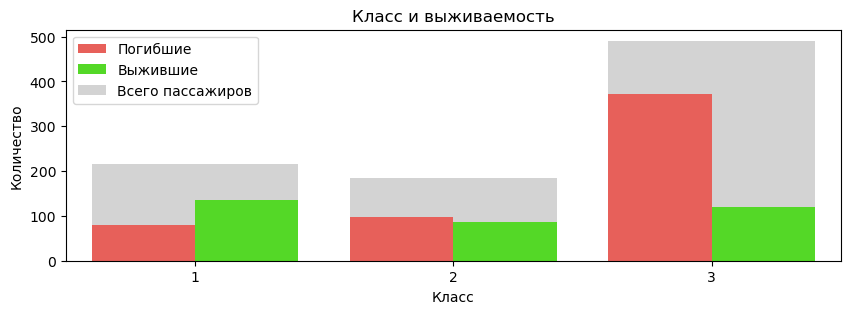

In [292]:
plt.figure(figsize=(10,3))
sns.countplot(x='Pclass', data=df, color='lightgray', label='Всего пассажиров')
sns.countplot(x='Pclass', hue='Survived', data=df, palette=['#ff4a42', '#46f609'])
plt.title('Класс и выживаемость')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(['Погибшие', 'Выжившие', 'Всего пассажиров'])

Наиболее многочисленной группой на борту являлись пассажиры третьего класса. Количества пассажиров первого и второго классов были сопоставимы между собой, но значительно уступали третьему классу.
Наблюдается чёткая зависимость между классом обслуживания и шансом на спасение.
- В третьем классе подавляющее большинство пассажиров не смогли спастись.
- Во втором классе наблюдается примерный паритет между численностью выживших и погибших.
- В первом классе количество выживших  превышает количество погибших. Разница достигает значительной величины - выживших примерно на треть больше.
Это демонстрирует, что класс обслуживания как показатель социально-экономического статуса являлся одним из ключевых факторов

***5. Возраст и выживаемость***

Text(0, 0.5, 'Количество')

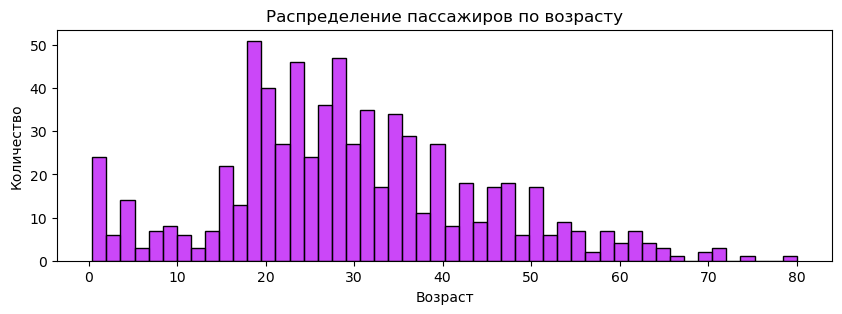

In [293]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Age'].dropna(), bins=50, color='#ba09f6', kde=False)
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')

Вывод:

Наиболее многочисленной категорией среди пассажиров были люди в возрасте от 18 до 35 лет. Эта группа составляет демографическое большинство на борту. Из исторического контекста. многие из них были экономически активными мигрантами, эмигрировавшими в поисках работы и новых возможностей в Америке. Это также объясняет высокую долю пассажиров третьего класса 

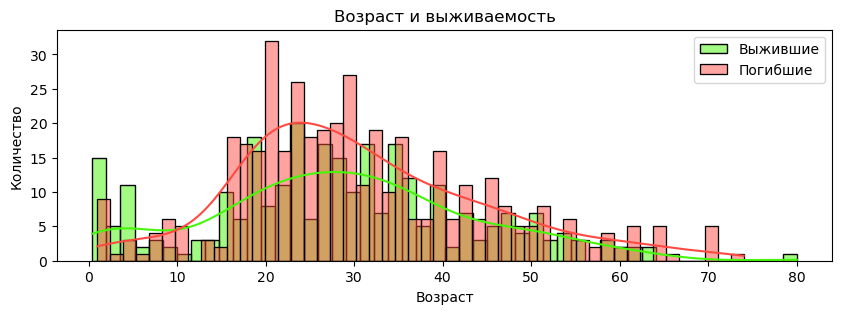

In [283]:
plt.figure(figsize=(10, 3))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=50, color='#46f609', label='Выжившие', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=50, color='#ff4a42', label='Погибшие', kde=True)
plt.title('Возраст и выживаемость')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()

***7. Корреляция признаков с выживаемостью***

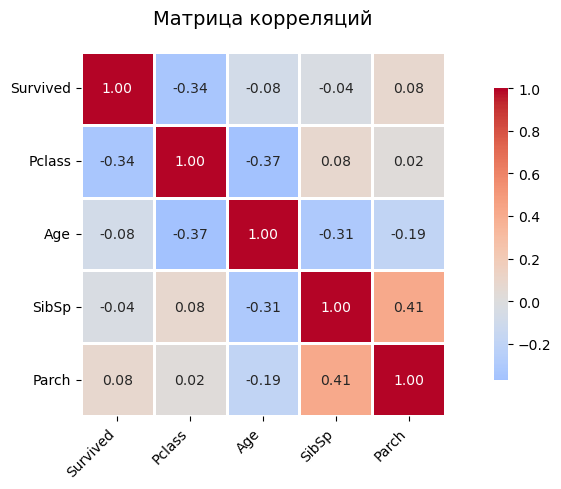

In [295]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()  
plt.figure(figsize=(10, 5)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,fmt='.2f',square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

***8. Создание новых признаков***

In [296]:
df_fe = df.copy()
df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch'] + 1 
df_fe['IsAlone'] = (df_fe['FamilySize'] == 1).astype(int) 
df_fe['MinorAge'] = (df_fe['Age'] < 18).astype(int) 
df_fe['MaleRisk'] = ((df_fe['Sex'] == 'male') & (df_fe['Pclass'] == 3) & (df_fe['Age'] >= 16) & (df_fe['Age'] <= 45) & (df_fe['IsAlone'] == 1)).astype(int)

***9. Корелляция новых признаков с выживаемостью***

In [297]:
new_features = ['IsAlone', 'FamilySize', 'MinorAge', 'MaleRisk']
target = 'Survived'
corr = df_fe[new_features + [target]].corr()[target].sort_values(ascending=False)
print(corr)

Survived      1.000000
MinorAge      0.122239
FamilySize    0.016639
IsAlone      -0.203367
MaleRisk     -0.232278
Name: Survived, dtype: float64


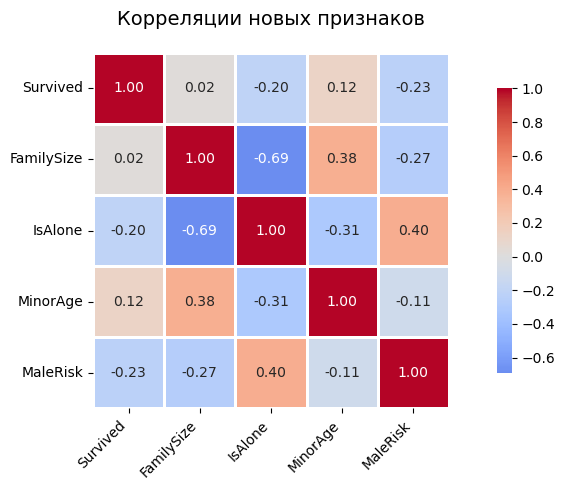

In [298]:
numeric_df = df_fe[['Survived','FamilySize', 'IsAlone', 'MinorAge', 'MaleRisk']]
correlation_matrix = numeric_df.corr()  
plt.figure(figsize=(10, 5)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,fmt='.2f',square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title('Корреляции новых признаков', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

***10. Преобразование данных перед обучением***

In [299]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   MinorAge    891 non-null    int64  
 9   MaleRisk    891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB


In [300]:
df_fe.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
FamilySize      0
IsAlone         0
MinorAge        0
MaleRisk        0
dtype: int64

In [301]:
df_fe['Age'] = df_fe['Age'].fillna(df_fe['Age'].median()) # Заполнение пропусков в возрасте медианным значением
df_fe['Sex'] = df_fe['Sex'].map({'male': 0, 'female': 1}) # Преобразование категориального признака (пол пассажира) в бинарный числовой (0\1)
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   MinorAge    891 non-null    int64  
 9   MaleRisk    891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [302]:
df_fe.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
FamilySize    0
IsAlone       0
MinorAge      0
MaleRisk      0
dtype: int64

In [303]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
new_features = ['FamilySize', 'IsAlone', 'MinorAge', 'MaleRisk']
target = 'Survived'

In [304]:
def print_metrics(y_true, y_pred_class, y_pred_prob):
    loss = log_loss(y_true, y_pred_prob)
    accuracy = accuracy_score(y_true, y_pred_class)
    precision = precision_score(y_true, y_pred_class)
    recall = recall_score(y_true, y_pred_class)
    f1 = f1_score(y_true, y_pred_class)
    cm = confusion_matrix(y_true, y_pred_class)

    print("Метрики модели:")
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nМатрица ошибок:")
    print(f"TN: {cm[0,0]}  FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]}  TP: {cm[1,1]}")
"""
    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Погиб','Выжил'], yticklabels=['Погиб','Выжил'])
    plt.title('Confusion Matrix')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
"""

***11. Обучение модели без новых признаков***

Метрики модели:
Loss: 0.4581
Accuracy: 0.7933
Precision: 0.7581
Recall: 0.6812
F1-score: 0.7176
ROC-AUC: 0.8505

Матрица ошибок:
TN: 95  FP: 15
FN: 22  TP: 47


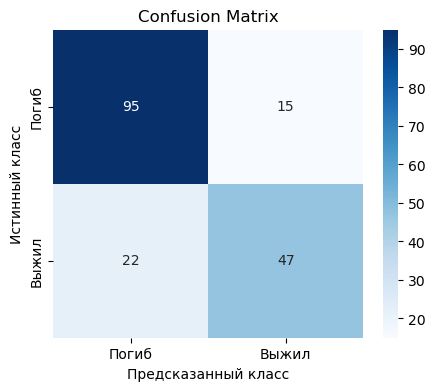

In [305]:
X = df_fe[features]  
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(solver='liblinear', random_state=42,max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred_class = log_reg.predict(X_test)
print_metrics(y_test, y_pred_class, y_pred_prob)

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Погиб', 'Выжил'],yticklabels=['Погиб', 'Выжил'],ax=axes)
axes.set_title('Confusion Matrix')
axes.set_xlabel('Предсказанный класс')
axes.set_ylabel('Истинный класс')
plt.tight_layout()

***12. Обучение модели с новыми признаками***

Метрики модели:
Loss: 0.4448
Accuracy: 0.8101
Precision: 0.7869
Recall: 0.6957
F1-score: 0.7385
ROC-AUC: 0.8629

Матрица ошибок:
TN: 97  FP: 13
FN: 21  TP: 48


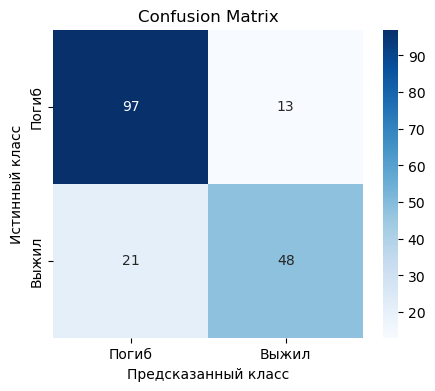

In [306]:
X = df_fe[features + new_features]  
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(solver='liblinear', random_state=42,max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred_class = log_reg.predict(X_test)
print_metrics(y_test, y_pred_class, y_pred_prob)


Confusion Matrix:
TN: 97, FP: 13, FN: 21, TP: 48


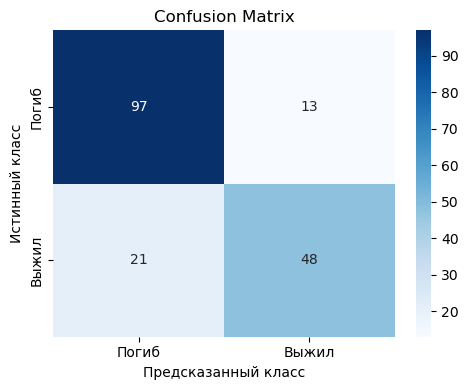

In [307]:
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Погиб', 'Выжил'],yticklabels=['Погиб', 'Выжил'],ax=axes)
axes.set_title('Confusion Matrix')
axes.set_xlabel('Предсказанный класс')
axes.set_ylabel('Истинный класс')
plt.tight_layout()

***13. Важность новых признаков***

In [308]:
X = df_fe[new_features]  
y = df_fe[target]        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10,min_samples_split=10)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

      Feature  Importance
0  FamilySize    0.528933
3    MaleRisk    0.219436
2    MinorAge    0.133632
1     IsAlone    0.117998

Accuracy: 0.64


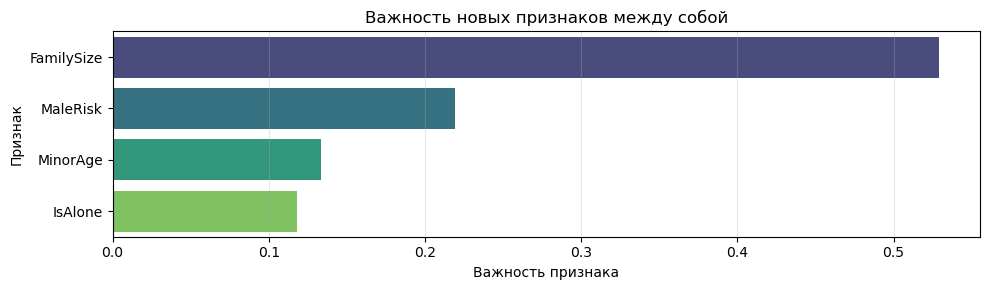

In [309]:
plt.figure(figsize=(10,3))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature',  palette='viridis', legend=False)
plt.title('Важность новых признаков между собой')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

In [310]:
X = df_fe[features + new_features]  
y = df_fe[target]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [311]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10,min_samples_split=10)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

ValueError: Found input variables with inconsistent numbers of samples: [712, 757]

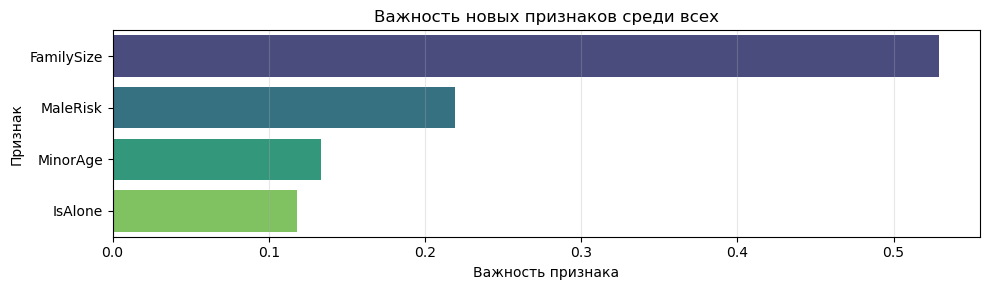

In [312]:
plt.figure(figsize=(10,3))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature',  palette='viridis', legend=False)
plt.title('Важность новых признаков среди всех')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

***Сравнение моделей***

In [313]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***14. Модель дерева (Random Forest Classifier)***

Метрики модели:
Loss: 0.4699
Accuracy: 0.7761
Precision: 0.7333
Recall: 0.6471
F1-score: 0.6875
ROC-AUC: 0.8514

Матрица ошибок:
TN: 71  FP: 12
FN: 18  TP: 33


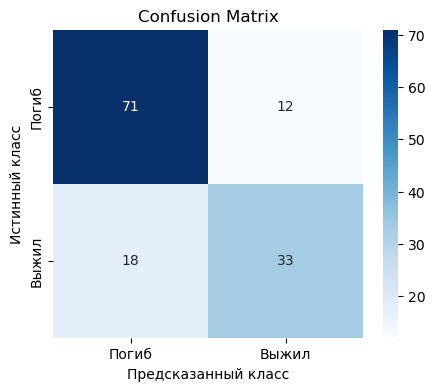

In [315]:
model_1 = RandomForestClassifier(
    max_depth=10,
    n_estimators=1000,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

model_1.fit(x_train, y_train)

y_pred_prob_1 = model_1.predict_proba(x_test)[:, 1]  # вероятности класса 1
y_pred_class_1 = model_1.predict(x_test)  # предсказанные классы
print_metrics(y_test, y_pred_class_1, y_pred_prob_1)

***15. Модель градиентного бустинга (Gradient Boosting Classifier).***

Метрики модели:
Loss: 0.7667
Accuracy: 0.7761
Precision: 0.7234
Recall: 0.6667
F1-score: 0.6939
ROC-AUC: 0.7997

Матрица ошибок:
TN: 70  FP: 13
FN: 17  TP: 34


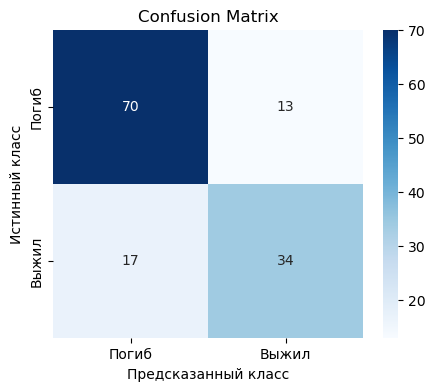

In [316]:
model_2 = GradientBoostingClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

model_2.fit(x_train, y_train)

y_pred_prob_2 = model_2.predict_proba(x_test)[:,1]  # вероятности класса 1
y_pred_class_2 = model_2.predict(x_test)  # классы
print_metrics(y_test, y_pred_class_2, y_pred_prob_2)

***17. Линейная модель логистичесской регрессии (Logistic Regression)***

In [ ]:
"""
model_3 = LogisticRegression(
    solver='liblinear',  # хорошо для маленьких датасетов
    random_state=42
)
model_3.fit(x_train, y_train)

y_pred_prob_3 = model_3.predict_proba(x_test)[:, 1]  # вероятности класса 1
y_pred_class_3 = model_3.predict(x_test)            # классы
print_metrics(y_test, y_pred_class_3, y_pred_prob_3)
"""

model_31 = LogisticRegression(
    solver='liblinear',
    random_state=42,
    class_weight='balanced',
    max_iter=500
)

model_31.fit(X_train_scaled, y_train)

y_pred_prob_31 = model_31.predict_proba(X_test_scaled)[:, 1]

# Оптимизация порога для F1
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_class = (y_pred_prob_31 >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_class))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Оптимальный порог для F1: {best_threshold:.2f}")

# Предсказания с оптимальным порогом
y_pred_class_31 = (y_pred_prob_31 >= best_threshold).astype(int)

# Печать метрик
print_metrics(y_test, y_pred_class_31, y_pred_prob_31)


***14. Нейронная сеть***

In [ ]:
"""
model_4 = Sequential([
    Dense(64,activation='relu',kernel_regularizer=l2(0.001),input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32,activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
"""
model_4 = tf.keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Явный Input слой
    
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model_4.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_4.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.15,
    callbacks=[early_stop],
    verbose=1
)

y_pred_prob_4 = model_4.predict(X_test, verbose=0).ravel()
y_pred_4 = (y_pred_prob_4 > 0.45).astype(int)
print_metrics(y_test, y_pred_4, y_pred_prob_4)

Epoch 1/50


In [ ]:
plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

***Кросс-валидация на 5 фолдах***

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df_fe[features + new_features]
y = df_fe[target]

THRESHOLD = 0.36
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)

fold_metrics = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Масштабирование (ВАЖНО: fit только на train)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Модель
    model = LogisticRegression(
        solver='liblinear',
        class_weight='balanced',
        max_iter=500,
        random_state=42
    )

    model.fit(X_train_scaled, y_train)

    # Предсказания
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_pred_prob >= THRESHOLD).astype(int)

    print(f"\nFold {fold}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Confusion Matrix:")
    print(f"TN: {tn}  FP: {fp}")
    print(f"FN: {fn}  TP: {tp}")

    fold_metrics.append({
        "report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": cm
    })
